In [1]:
.libPaths('/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library')

In [10]:
a <- read.table('/disk1/wenqing/tmp_data/human_brain/gene_ei/19/regular/over0/geneWzRes_ad.txt')
head(a)
flag1 <- a$V3-a$V2 < 10000
flag2 <- a$V5 > 100


,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<int>
1,chr1,141473,173862,RP11-34P13.13,5
2,chr1,317719,453948,RP4-669L17.10,37
3,chr1,536815,659930,RP5-857K21.4,3
4,chr1,677192,685396,RP11-206L10.3,4
5,chr1,700236,714006,RP11-206L10.2,3
6,chr1,947376,948573,RP11-54O7.11,12


In [ ]:
for(i in 1:nrow(a)){
    if(flag1[i] & flag2[i]){
        print(a$V4[i])
    }
}

In [2]:
find_gene_res_num <- function(x){
    gene <- strsplit(uniq_gene_region[x],"_")[[1]][4]
    res_num <- sum(dat$V8[dat$V4==gene])
    return(res_num)
}

In [4]:
for(path in c('124','126','128','129','131','132','133','134','137','138')){


In [6]:

    dat <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei_onecell/17/geneWithRegular_res.txt")

    dat$V10 <- paste0(dat$V1,"_",dat$V2,"_",dat$V3,"_",dat$V4)
    #head(dat)
    uniq_gene_region <- unique(dat$V10)
    #length(uniq_gene_region)

    gene_res_num <- apply(as.matrix(1:length(uniq_gene_region)),1,find_gene_res_num)


    new_dat_col1 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][1]})
    new_dat_col2 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][2]})
    new_dat_col3 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][3]})
    new_dat_col4 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][4]})
    new_dat_col5 <- gene_res_num
    new_dat <- as.data.frame(cbind(new_dat_col1,new_dat_col2,new_dat_col3,new_dat_col4,new_dat_col5))
    write.table(new_dat,"/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei_onecell/17/geneWzRes_ad.txt",quote=F,col.names=F,row.names=F,sep='\t')


In [ ]:
library(pheatmap)
library(DESeq2)

In [15]:
#########asd Vs ctr gene ei差异
asd_284 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/284/regular_EI_inGene_over0.txt')
asd_285 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/285/regular_EI_inGene_over0.txt')
asd_288 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/288/regular_EI_inGene_over0.txt')
asd_289 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/289/regular_EI_inGene_over0.txt')
asd_290 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/290/regular_EI_inGene_over0.txt')
asd_291 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/291/regular_EI_inGene_over0.txt')
asd_292 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/292/regular_EI_inGene_over0.txt')
asd_293 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/293/regular_EI_inGene_over0.txt')
asd_299 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/299/regular_EI_inGene_over0.txt')
asd_300 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/asd/gene_ei/300/regular_EI_inGene_over0.txt')



In [18]:
shared_genes <- intersect(rownames(asd_284),rownames(asd_285))
shared_genes <- intersect(shared_genes,rownames(asd_288))
shared_genes <- intersect(shared_genes,rownames(asd_289))
shared_genes <- intersect(shared_genes,rownames(asd_290))
shared_genes <- intersect(shared_genes,rownames(asd_291))
shared_genes <- intersect(shared_genes,rownames(asd_292))
shared_genes <- intersect(shared_genes,rownames(asd_293))
shared_genes <- intersect(shared_genes,rownames(asd_299))
shared_genes <- intersect(shared_genes,rownames(asd_300))
length(shared_genes)

[1] 761

In [16]:
#########asd Vs ctr gene ei差异
ctr_124 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/124/regular_EI_inGene_over0.txt')
ctr_126 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/126/regular_EI_inGene_over0.txt')
ctr_128 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/128/regular_EI_inGene_over0.txt')
ctr_129 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/129/regular_EI_inGene_over0.txt')
ctr_131 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/131/regular_EI_inGene_over0.txt')
ctr_132 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/132/regular_EI_inGene_over0.txt')
ctr_133 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/133/regular_EI_inGene_over0.txt')
ctr_134 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/134/regular_EI_inGene_over0.txt')
ctr_137 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/137/regular_EI_inGene_over0.txt')
ctr_138 <- read.table('/disk1/wenqing/tmp_data/ASD_bulk/ctr/gene_ei/138/regular_EI_inGene_over0.txt')


In [19]:
shared_genes_ctr <- intersect(rownames(ctr_124),rownames(ctr_126))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_128))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_129))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_131))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_132))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_133))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_134))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_137))
shared_genes_ctr <- intersect(shared_genes_ctr,rownames(ctr_138))
length(shared_genes_ctr)

[1] 416

In [21]:
shared_genes_all <- intersect(shared_genes,shared_genes_ctr)
length(shared_genes_all)

[1] 311

In [57]:
data <- as.data.frame(cbind(asd_284[shared_genes_all,],asd_285[shared_genes_all,],asd_288[shared_genes_all,],asd_289[shared_genes_all,],asd_290[shared_genes_all,],
                asd_291[shared_genes_all,],asd_292[shared_genes_all,],asd_293[shared_genes_all,],asd_299[shared_genes_all,],asd_300[shared_genes_all,],
                ctr_124[shared_genes_all,],ctr_126[shared_genes_all,],ctr_128[shared_genes_all,],ctr_129[shared_genes_all,],ctr_131[shared_genes_all,],
                ctr_132[shared_genes_all,],ctr_133[shared_genes_all,],ctr_134[shared_genes_all,],ctr_137[shared_genes_all,],ctr_138[shared_genes_all,]))

In [58]:
colnames(data) <- c('asd_284','asd_285','asd_288','asd_289','asd_290','asd_291','asd_292','asd_293','asd_299','asd_300',
                    'ctr_124','ctr_126','ctr_128','ctr_129','ctr_131','ctr_132','ctr_133','ctr_134','ctr_137','ctr_138')

rownames(data) <- shared_genes_all

In [59]:
ncol(data)

[1] 20

In [10]:
annotation_col = data.frame(
  condition = factor(rep(c("Asd","Ctr"),each=10)),
  phases = factor(c("284","285","288","289","290","291","292","293","299","300","124","126","128","129","131","132","133","134","137","138"))
  #phases = factor(rep(c("16","20",'25'),times=3))
)


In [56]:
dim(annotation_col)

[1] 20  2

In [61]:
rownames(annotation_col) <- colnames(data)

In [62]:
head(data*10^4)

,asd_284,asd_285,asd_288,asd_289,asd_290,asd_291,asd_292,asd_293,asd_299,asd_300,ctr_124,ctr_126,ctr_128,ctr_129,ctr_131,ctr_132,ctr_133,ctr_134,ctr_137,ctr_138
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C3orf83,99.66777,130.02191,42.46285,50.26810,16.86341,41.68983,22.55300,54.03580,39.81797,53.41880,88.72286,85.85630,27.67528,57.47126,33.24100,42.56966,17.80944,25.47307,55.03145,59.82906
RNF115,45.53286,71.56694,77.54552,42.86589,44.68135,55.06797,82.09539,90.23790,80.35356,104.70751,85.63336,88.89377,129.61296,70.44865,77.79134,71.34915,68.44693,40.99540,32.74733,63.77551
FBXL18,33.31251,82.61704,33.11628,39.27169,44.13682,58.20399,74.31629,59.19053,59.27425,59.59476,47.87677,66.11432,51.90311,20.24291,41.14468,57.66692,61.01630,85.74491,78.05907,39.03006
XPOT,51.33342,64.43530,63.13574,67.36842,30.39288,47.99089,65.22330,58.29904,79.55881,43.34180,46.52766,22.18637,44.15435,20.32520,41.90920,44.47662,58.54509,33.31113,51.00246,49.65753
AC007390.5,11.33236,11.91422,29.79886,40.91938,31.05882,35.99771,22.83644,51.20702,11.69591,47.11220,58.46027,84.28657,49.18337,41.84100,62.92606,59.76663,73.59829,73.88556,70.36060,41.46305
RPS20,34.58413,40.84440,38.25189,35.13015,39.06250,47.49536,64.65691,71.50675,54.97604,49.73887,61.14703,91.17035,30.68157,44.05286,65.38973,74.71878,62.05372,53.25050,42.02224,66.68918


In [32]:
#差异分析
dds <- DESeqDataSetFromMatrix(countData = round(data*10^4), colData = annotation_col, design = ~ condition)


dds <- DESeq(dds)
res <- results(dds,contrast = c("condition","Asd","Ctr"))
res1 <- data.frame(res, stringsAsFactors = FALSE, check.names = FALSE)
write.table(res1, "/disk1/wenqing/tmp_data/ASD_bulk/de_gene_ei.txt", col.names = NA, sep = '\t', quote = FALSE)
#res <- subset(res, padj < 0.1 & abs(log2FoldChange) > 1)



converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [63]:
head(round(data*10^3))
annotation_col

,asd_284,asd_285,asd_288,asd_289,asd_290,asd_291,asd_292,asd_293,asd_299,asd_300,ctr_124,ctr_126,ctr_128,ctr_129,ctr_131,ctr_132,ctr_133,ctr_134,ctr_137,ctr_138
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C3orf83,10,13,4,5,2,4,2,5,4,5,9,9,3,6,3,4,2,3,6,6
RNF115,5,7,8,4,4,6,8,9,8,10,9,9,13,7,8,7,7,4,3,6
FBXL18,3,8,3,4,4,6,7,6,6,6,5,7,5,2,4,6,6,9,8,4
XPOT,5,6,6,7,3,5,7,6,8,4,5,2,4,2,4,4,6,3,5,5
AC007390.5,1,1,3,4,3,4,2,5,1,5,6,8,5,4,6,6,7,7,7,4
RPS20,3,4,4,4,4,5,6,7,5,5,6,9,3,4,7,7,6,5,4,7


,condition,phases
,<fct>,<fct>
asd_284,Asd,284
asd_285,Asd,285
asd_288,Asd,288
asd_289,Asd,289
asd_290,Asd,290
asd_291,Asd,291
asd_292,Asd,292
asd_293,Asd,293
asd_299,Asd,299


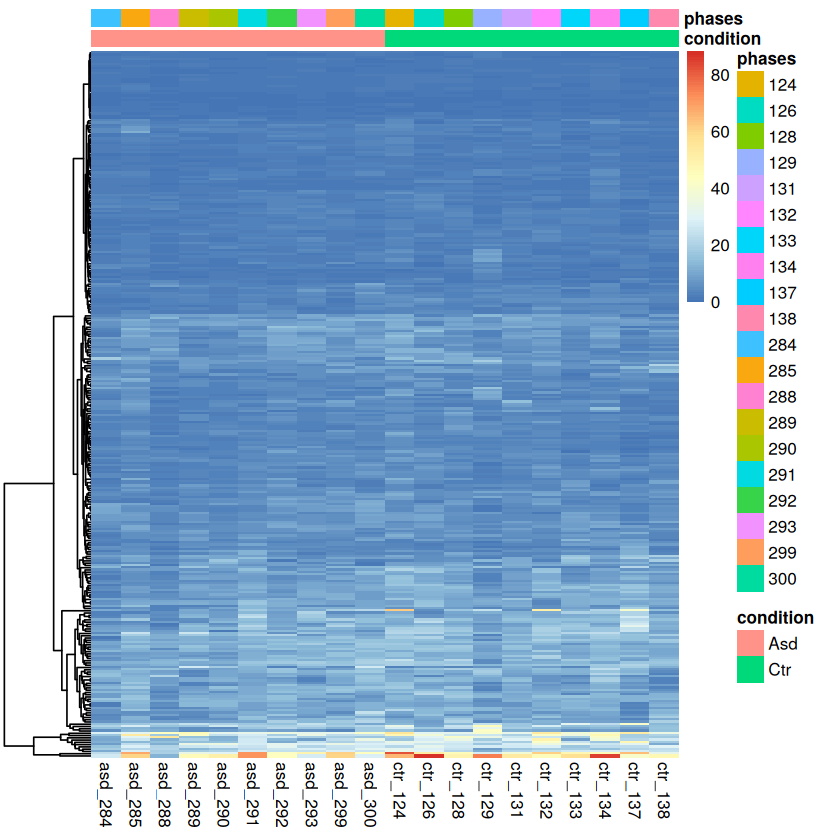

In [68]:
pheatmap(round(data*10^3), annotation_col = annotation_col, annotation_legend = TRUE,cluster_cols = F,cluster_rows = T,show_rownames=F)


In [78]:
p_vals <- c()
for(i in 1:nrow(data)){
    p_val <- wilcox.test(as.numeric(data[i,1:10])*100,as.numeric(data[i,11:20])*100)$p.value
    p_vals <- c(p_vals,p_val)
}


In [82]:
de_gene_ei <- rownames(data)[p_vals < 0.05]
de_gene_ei

[1] "XPOT"         "AC007390.5"   "MPRIP"        "PPP6R2"       "OIP5-AS1"    
 [6] "FBXO27"       "TXNDC15"      "POLR2J4"      "CTSB"         "IPP"         
[11] "SYT11"        "DCLRE1CP1"    "XIAP"         "AC007383.4"   "RASA4CP"     
[16] "DDOST"        "PLCXD1"       "C19orf52"     "INIP"         "ORAI2"       
[21] "CEBPZ"        "RP11-514P8.7" "CRCP"

In [3]:
gene_ei_17 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/17/regular_EI_inGene_over1.txt")
gene_ei_18 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/18/regular_EI_inGene_over1.txt")
gene_ei_57 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/57/regular_EI_inGene_over1.txt")

gene_ei_20 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/20/regular_EI_inGene_over1.txt")
gene_ei_32 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/32/regular_EI_inGene_over1.txt")
gene_ei_56 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/56/regular_EI_inGene_over1.txt")



In [5]:
shared_genes <- intersect(rownames(gene_ei_17),rownames(gene_ei_18))
shared_genes <- intersect(shared_genes,rownames(gene_ei_57))
shared_genes <- intersect(shared_genes,rownames(gene_ei_20))
shared_genes <- intersect(shared_genes,rownames(gene_ei_32))
shared_genes <- intersect(shared_genes,rownames(gene_ei_56))

length(shared_genes)

[1] 11419

In [6]:
data <- cbind(gene_ei_17[shared_genes,],gene_ei_18[shared_genes,],gene_ei_57[shared_genes,],gene_ei_20[shared_genes,],gene_ei_32[shared_genes,],gene_ei_56[shared_genes,])

In [9]:
colnames(data) <- c('17','18','57','20','32','56')
rownames(data) <- shared_genes

In [11]:
annotation_col = data.frame(
  condition = factor(rep(c("Asd","Ctr"),each=3)),
  phases = factor(c('17','18','57','20','32','56'))
  #phases = factor(rep(c("16","20",'25'),times=3))
)

In [18]:
rownames(annotation_col) <- colnames(data)

In [16]:
head(data)

,17,18,57,20,32,56
RNF14,0.002000572,0.0009203146,0.0013227513,0.0030429821,0.002757811,0.0017042643
UBE2Q2,0.001007290,0.0005812639,0.0005486493,0.0026068822,0.001788171,0.0018971696
RNF10,0.001520270,0.0010233138,0.0021620555,0.0023436123,0.004052983,0.0012262649
RNF11,0.003685041,0.0039814399,0.0031162333,0.0062397337,0.006735608,0.0030202003
RNF13,0.001610408,0.0004234868,0.0008473336,0.0006383173,0.001232639,0.0006976692
GTF2IP1,0.005861252,0.0024286418,0.0058630558,0.0064984773,0.006174863,0.0031352627


In [19]:
dds <- DESeqDataSetFromMatrix(countData = round(data*10^4), colData = annotation_col, design = ~ condition)


dds <- DESeq(dds)
res <- results(dds,contrast = c("condition","Asd","Ctr"))
res1 <- data.frame(res, stringsAsFactors = FALSE, check.names = FALSE)

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [69]:
?DESeq

DESeq                  package:DESeq2                  R Documentation

_D_i_f_f_e_r_e_n_t_i_a_l _e_x_p_r_e_s_s_i_o_n _a_n_a_l_y_s_i_s _b_a_s_e_d _o_n _t_h_e _N_e_g_a_t_i_v_e _B_i_n_o_m_i_a_l (_a._k._a.
_G_a_m_m_a-_P_o_i_s_s_o_n) _d_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This function performs a default analysis through the steps:

       1. estimation of size factors: ‘estimateSizeFactors’

       2. estimation of dispersion: ‘estimateDispersions’

       3. Negative Binomial GLM fitting and Wald statistics:
          ‘nbinomWaldTest’

     For complete details on each step, see the manual pages of the
     respective functions. After the ‘DESeq’ function returns a
     DESeqDataSet object, results tables (log2 fold changes and
     p-values) can be generated using the ‘results’ function. Shrunken
     LFC can then be generated using the ‘lfcShrink’ function.  All
     support q

In [68]:
res1[which(res1$pvalue < 0.01),]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AATK-AS1,37.860594,2.050090,0.6265360,3.272102,1.067510e-03,0.273081147
UPK2,175.251072,2.416106,0.4996011,4.836071,1.324310e-06,0.003769427
DGUOK-AS1,78.767430,2.835484,0.7324530,3.871216,1.082938e-04,0.062739685
C14orf132,6.197961,3.240593,1.0013409,3.236253,1.211098e-03,NA
RP11-231C18.1,82.279355,2.933271,0.6841781,4.287292,1.808648e-05,0.023465732
RP11-195B21.3,11.343127,1.645280,0.6096669,2.698654,6.962043e-03,NA
AC116366.6,84.186931,1.524666,0.5174373,2.946572,3.213174e-03,0.454552359
FSIP1,13.454783,-1.724203,0.6052802,-2.848603,4.391158e-03,NA
ZNF837,60.149633,1.718344,0.5013834,3.427206,6.098256e-04,0.200280804


In [ ]:
res1

In [ ]:
p_vals <- c()
for(i in 1:nrow(data)){
    p_val <- wilcox.test(round(data[i,1:3]*10^4),round(data[i,4:6]*10^4))$p.value
    p_vals <- c(p_vals,p_val)
}


In [39]:
i=1
a <- wilcox.test(round(data[i,1:3]*10^4),round(data[i,4:6]*10^4))

In [42]:
sum(round(data[i, 1:3] * 10^4))
sum(round(data[i, 4:6] * 10^4))

[1] 42

[1] 75

In [29]:
data[i,1:3]

17           18           57 
0.0018845896 0.0011911949 0.0005434988

In [52]:
genes_sig <- shared_genes[which(p_vals < 0.1)]

In [43]:
flags <- c()
for(j in which(p_vals < 0.1)){
    if(sum(data[j,1:3]) < sum(data[j,4:6])){
        flag <- 'down'
    }
    else{
        flag <- 'up'
    }
    flags <- c(flags,flag)
}

In [45]:
length(flags)

[1] 198

In [48]:
de_gene_ei <- as.data.frame(cbind(p_vals[which(p_vals < 0.1)],flags))

In [54]:
rownames(de_gene_ei) <- genes_sig
colnames(de_gene_ei) <- c('p_value','expr')

In [60]:
write.csv(de_gene_ei,"/disk1/wenqing/tmp_data/ASD/de_gene_ei_pval01.csv",quote=F)

In [56]:
asd_genes <- read.table("/disk1/wenqing/tmp_data/ASD/102_ASD_genes.txt")

In [59]:
de_gene_ei[intersect(genes_sig,asd_genes$V1),]

,p_value,expr
,<chr>,<chr>
GRIN2B,0.0765225004750592,down
MBD5,0.0765225004750592,down
GRIA2,0.0765225004750592,down
CTNNB1,0.0636025696207536,down


In [70]:
17/263

[1] 0.06463878

In [78]:
GRIN2B_res_17 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/17/GRIN2B_17.txt")
GRIN2B_res_18 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/18/GRIN2B_18.txt")
GRIN2B_res_57 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/57/GRIN2B_57.txt")

GRIN2B_res_20 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/20/GRIN2B_20.txt")
GRIN2B_res_32 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/32/GRIN2B_32.txt")
GRIN2B_res_56 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/56/GRIN2B_56.txt")

In [79]:
shared_res <- intersect(GRIN2B_res_17$V6,GRIN2B_res_18$V6)
shared_res <- intersect(shared_res,GRIN2B_res_57$V6)
shared_res <- intersect(shared_res,GRIN2B_res_20$V6)
shared_res <- intersect(shared_res,GRIN2B_res_32$V6)
shared_res <- intersect(shared_res,GRIN2B_res_56$V6)

In [81]:
asd_res <- union(GRIN2B_res_17$V6,GRIN2B_res_18$V6)
asd_res <- union(asd_res,GRIN2B_res_57$V6)

In [84]:
ctr_res <- union(GRIN2B_res_20$V6,GRIN2B_res_32$V6)
ctr_res <- union(ctr_res,GRIN2B_res_56$V6)

In [87]:
asd_specific_res <- setdiff(asd_res,ctr_res)
ctr_specific_res <- setdiff(ctr_res,asd_res)

In [91]:
length(asd_specific_res)
length(ctr_specific_res)
length(shared_res)

[1] 121

[1] 178

[1] 6

In [96]:
write.table(asd_specific_res,"/disk1/wenqing/tmp_data/ASD/GRIN2B_res/asd_specific_res.txt",quote=F,row.names=F,col.names=F)
write.table(ctr_specific_res,"/disk1/wenqing/tmp_data/ASD/GRIN2B_res/ctr_specific_res.txt",quote=F,row.names=F,col.names=F)
write.table(shared_res,"/disk1/wenqing/tmp_data/ASD/GRIN2B_res/shared_res.txt",quote=F,row.names=F,col.names=F)


In [103]:
JPH1_res_17 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/17/JPH1_17.txt")
JPH1_res_18 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/18/JPH1_18.txt")
JPH1_res_57 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_male_pfc/gene_ei/57/JPH1_57.txt")

JPH1_res_20 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/20/JPH1_20.txt")
JPH1_res_32 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/32/JPH1_32.txt")
JPH1_res_56 <- read.table("/disk1/wenqing/tmp_data/ASD/ctr_male_pfc/gene_ei/56/JPH1_56.txt")
shared_res <- intersect(JPH1_res_17$V6,JPH1_res_18$V6)
shared_res <- intersect(shared_res,JPH1_res_57$V6)
shared_res <- intersect(shared_res,JPH1_res_20$V6)
shared_res <- intersect(shared_res,JPH1_res_32$V6)
shared_res <- intersect(shared_res,JPH1_res_56$V6)
asd_res <- union(JPH1_res_17$V6,JPH1_res_18$V6)
asd_res <- union(asd_res,JPH1_res_57$V6)
ctr_res <- union(JPH1_res_20$V6,JPH1_res_32$V6)
ctr_res <- union(ctr_res,JPH1_res_56$V6)
asd_specific_res <- setdiff(asd_res,ctr_res)
ctr_specific_res <- setdiff(ctr_res,asd_res)
length(asd_specific_res)
length(ctr_specific_res)
length(shared_res)
write.table(asd_specific_res,"/disk1/wenqing/tmp_data/ASD/JPH1_res/asd_specific_res.txt",quote=F,row.names=F,col.names=F)
write.table(ctr_specific_res,"/disk1/wenqing/tmp_data/ASD/JPH1_res/ctr_specific_res.txt",quote=F,row.names=F,col.names=F)
write.table(shared_res,"/disk1/wenqing/tmp_data/ASD/JPH1_res/shared_res.txt",quote=F,row.names=F,col.names=F)


[1] 7

[1] 13

[1] 0

In [1]:
ei_in_shared_intron <- round(c(0.0005811720643163752,0.0004557602316032276,0.0002509097249490738,0.0007562304612330607,0.0009004472066410302,0.0007835058638725447)*10^4)

In [2]:
wilcox.test(ei_in_shared_intron[1:3],ei_in_shared_intron[4:6])

Warning message in wilcox.test.default(ei_in_shared_intron[1:3], ei_in_shared_intron[4:6]):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  ei_in_shared_intron[1:3] and ei_in_shared_intron[4:6]
W = 0, p-value = 0.07652
alternative hypothesis: true location shift is not equal to 0
